# 문제 1
- 아기 상어
- https://www.acmicpc.net/problem/16236

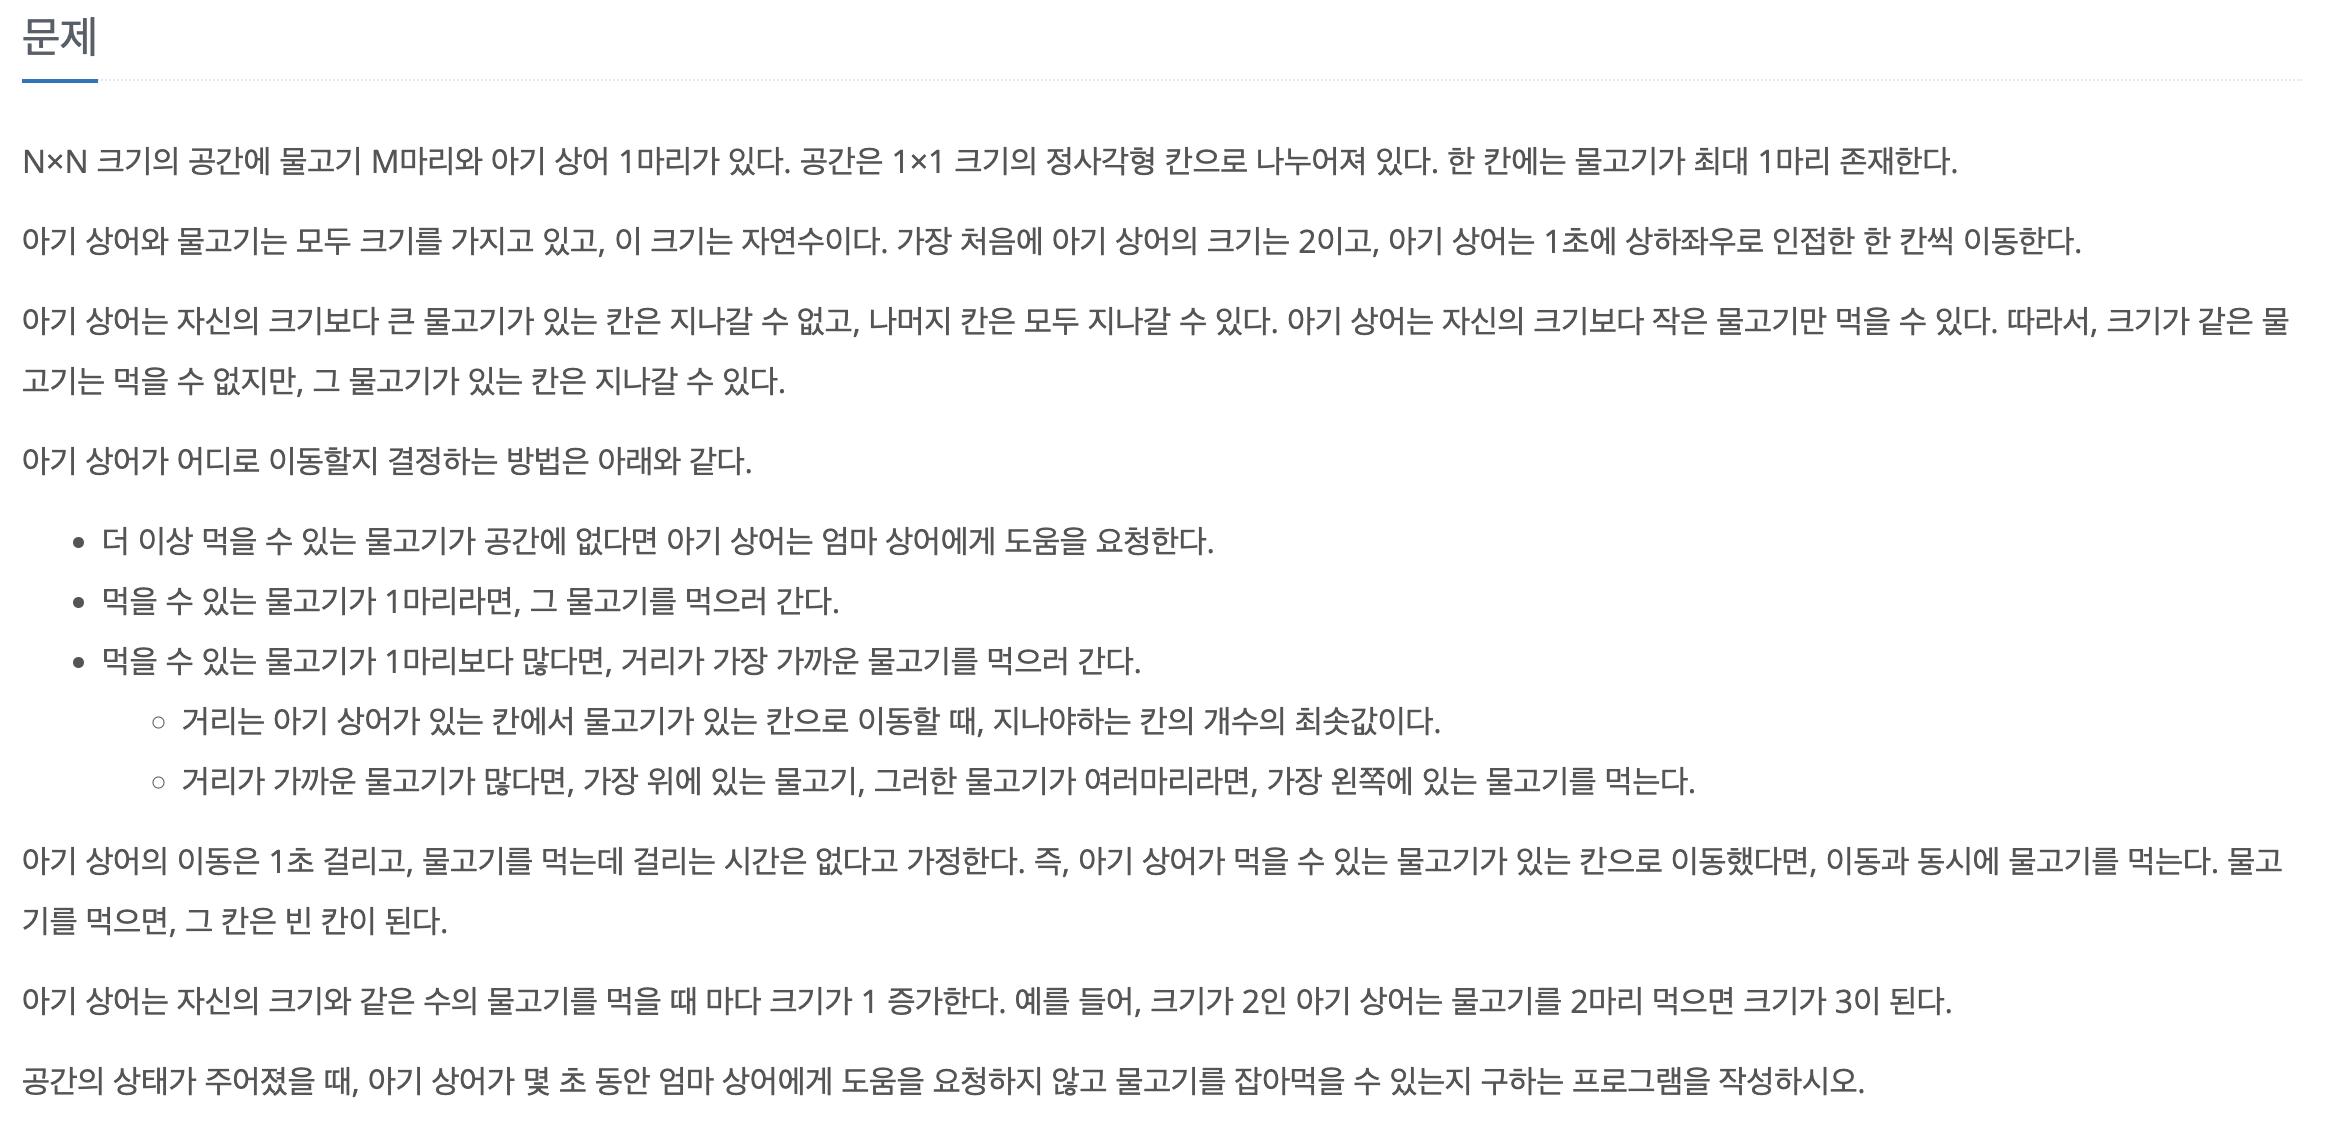
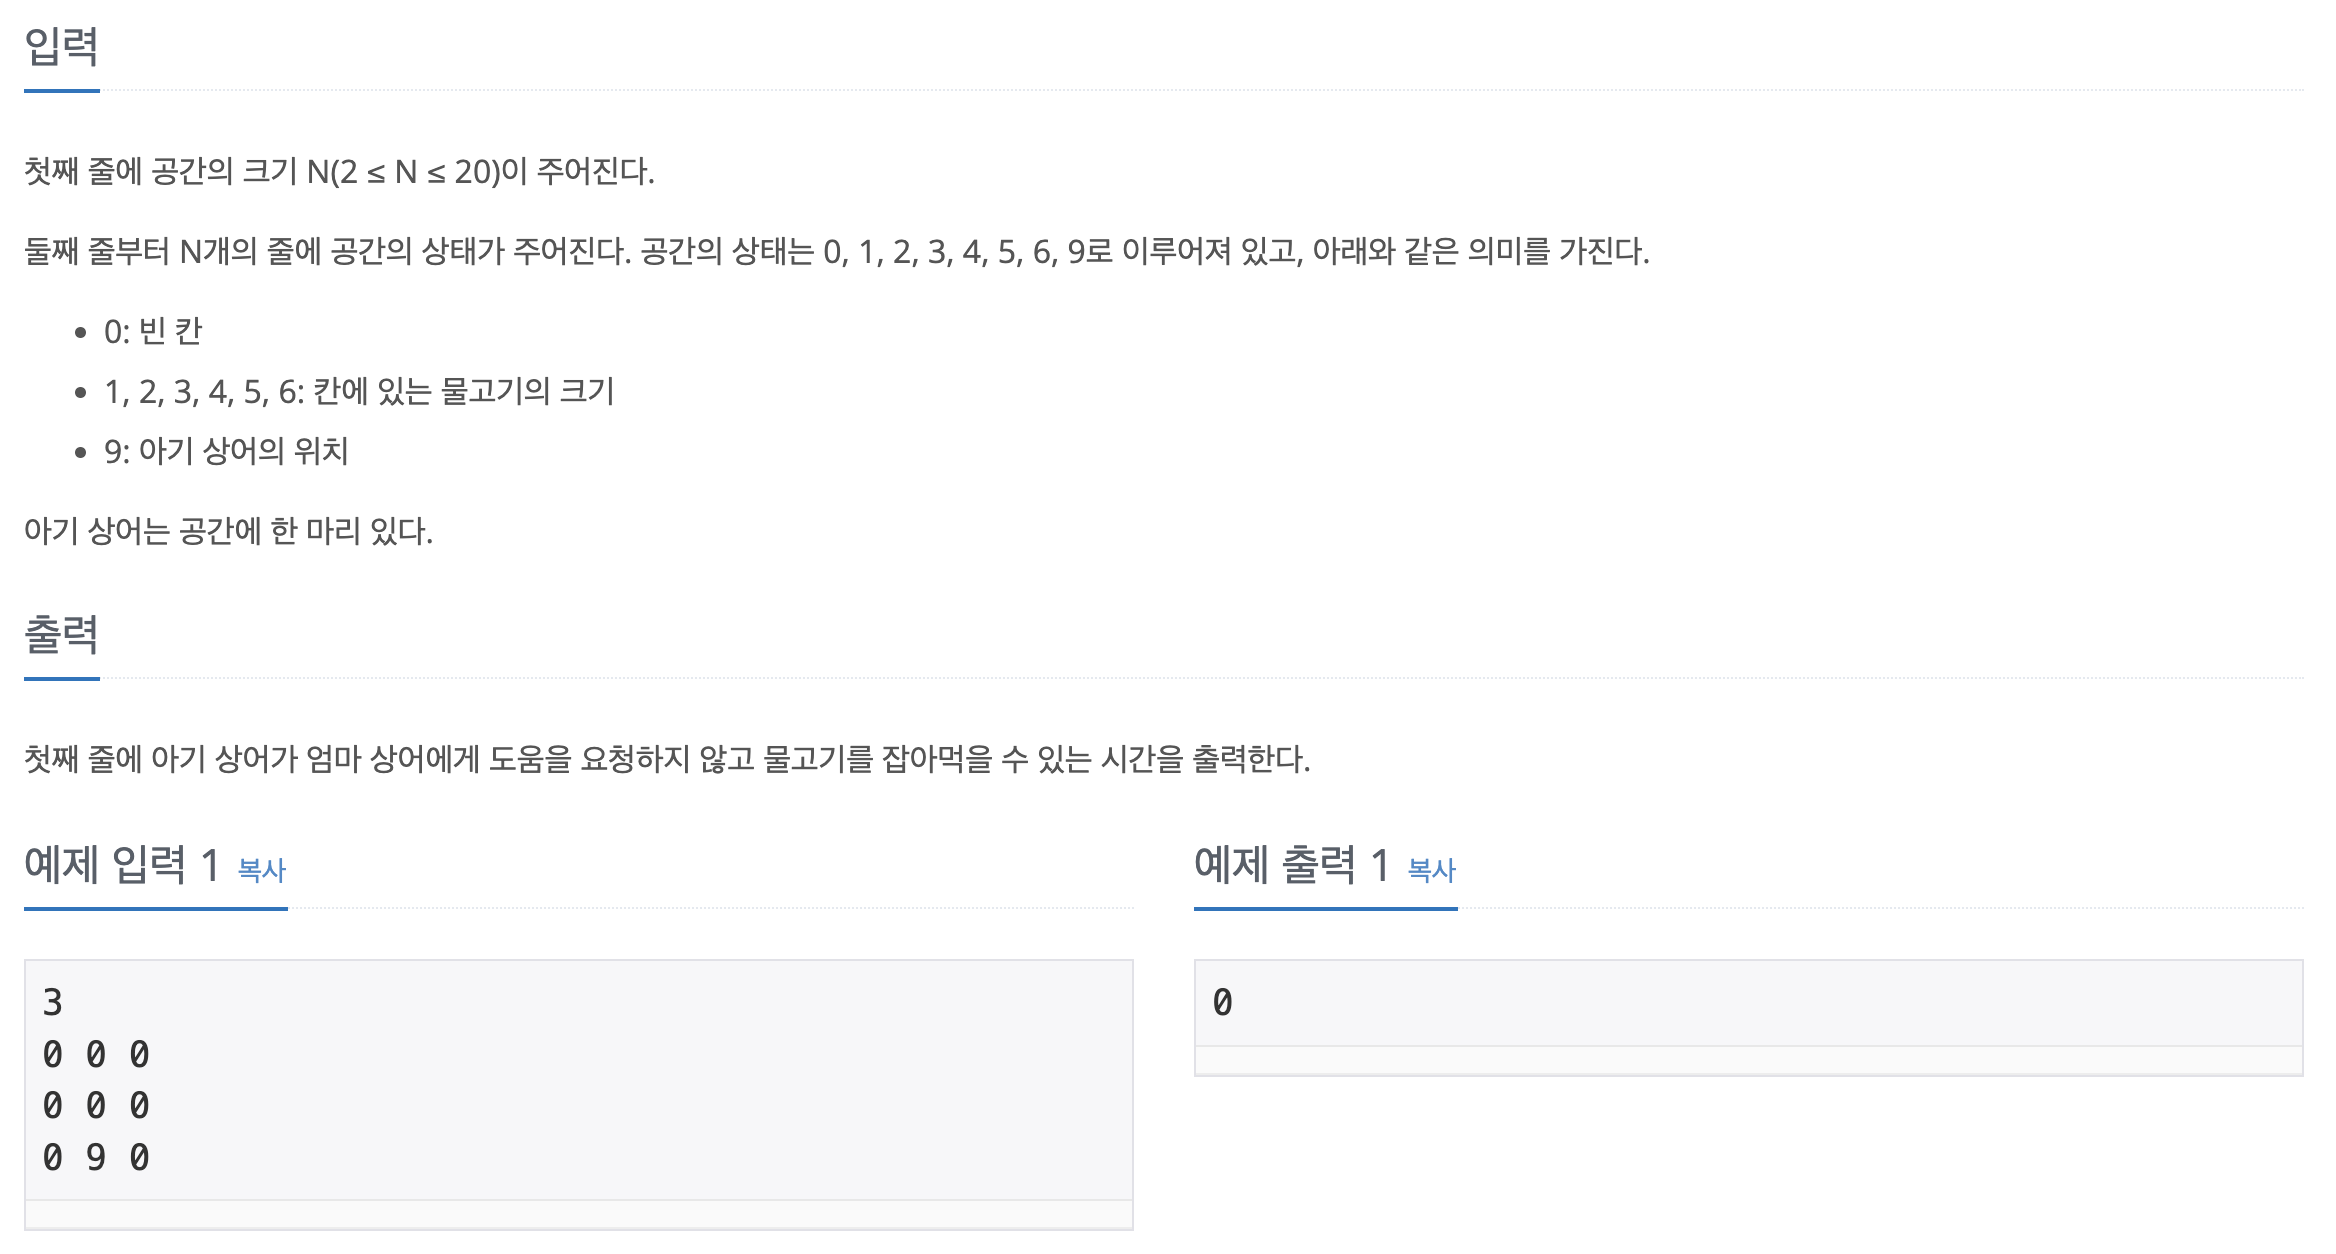
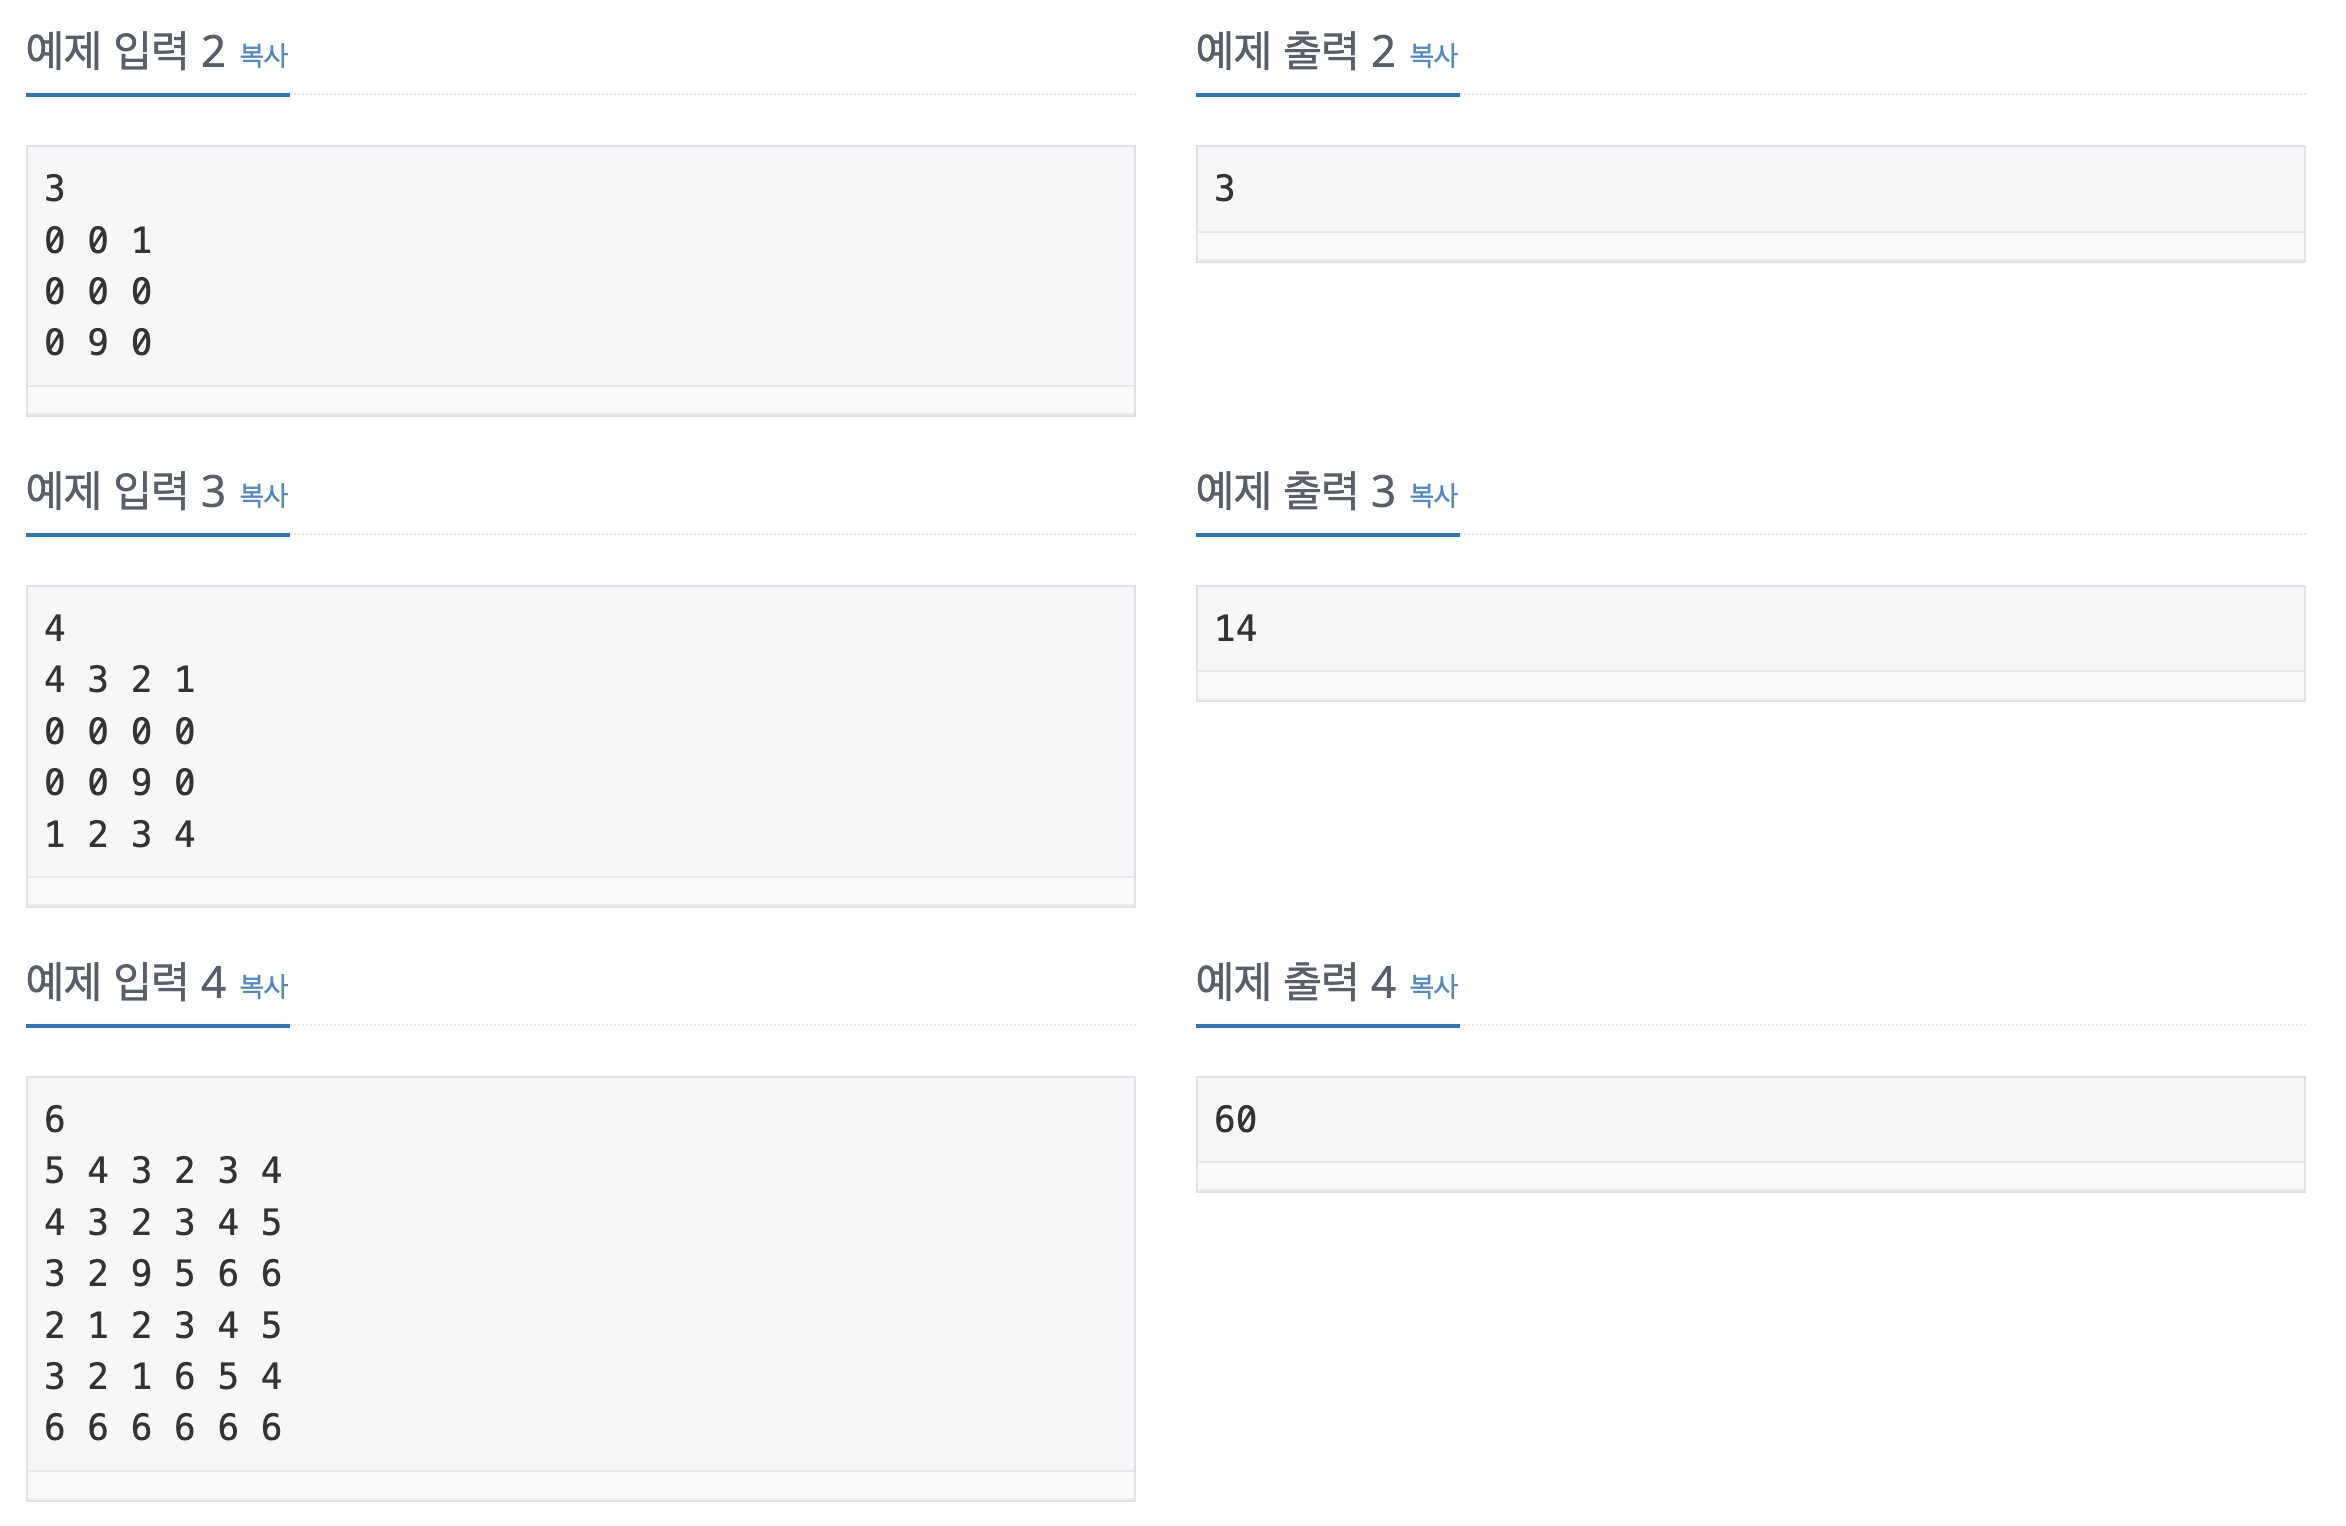
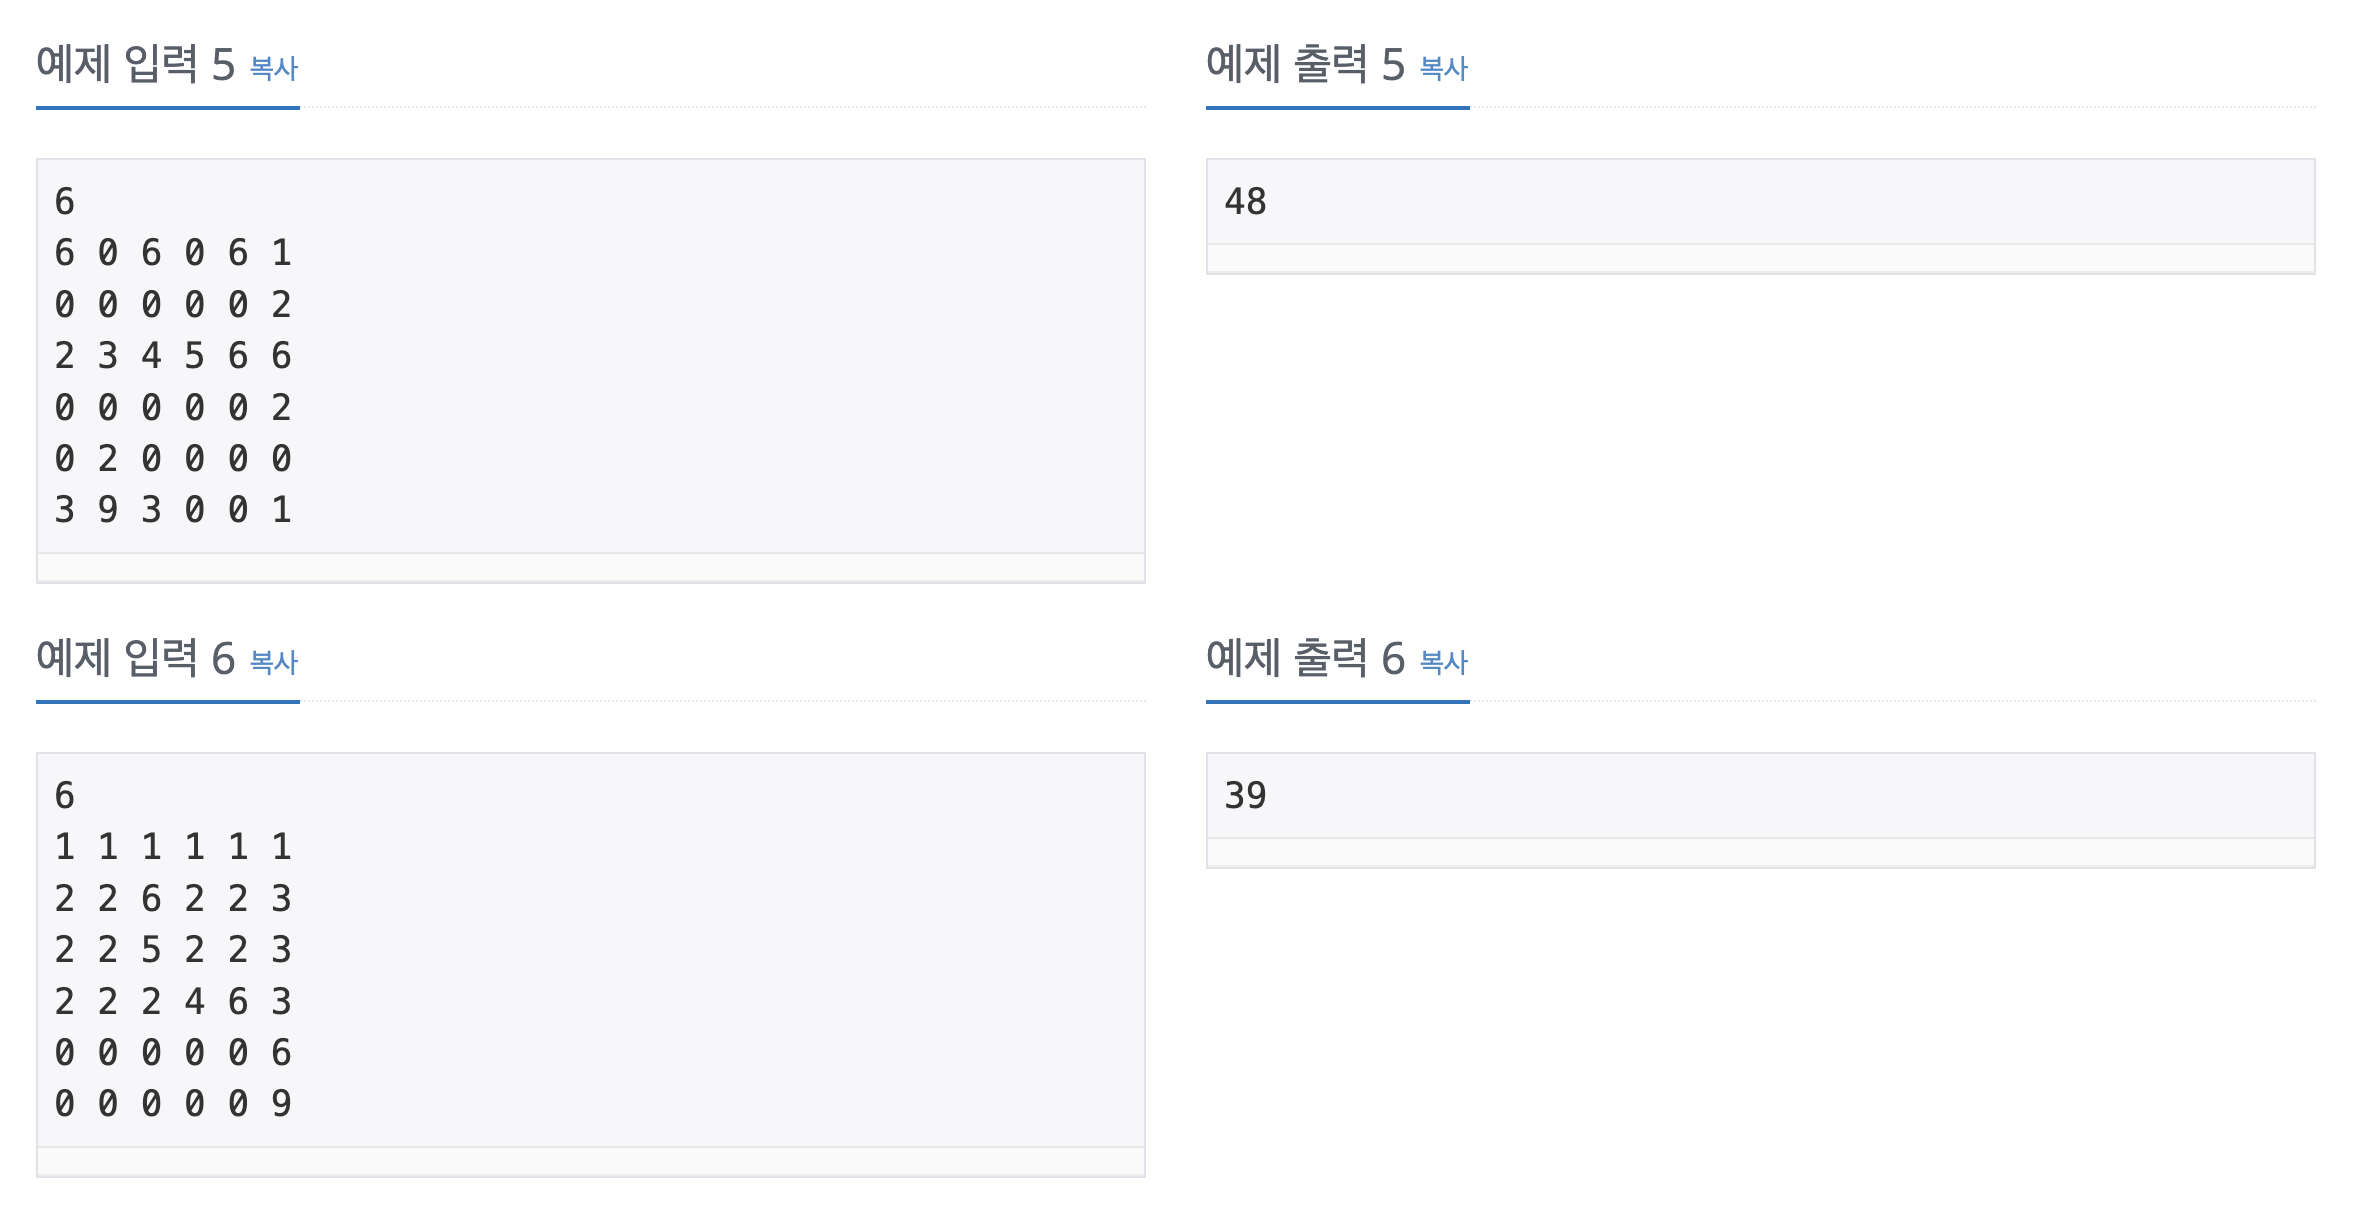

## 참고 코드
- https://resilient-923.tistory.com/357

In [85]:
import sys
from collections import deque

# input = sys.stdin.readline

# 먹을 수 있는 물고기가 1마리라면, 그 물고기를 먹으러 간다.
# 먹을 수 있는 물고기가 1마리보다 많다면, 거리가 가장 가까운 물고기를 먹으러 간다.

n = int(input())
graph = []
for _ in range(n):
    graph.append(list(map(int,input().split())))


dx = [0,0,1,-1]
dy = [1,-1,0,0]
cnt = 0
x,y,size = 0,0,2
#상어위치
for i in range(n):
    for j in range(n):
        if graph[i][j] == 9:
            x = i
            y = j

def biteFish(x,y,shark_size):
    distance = [[0] * n for _ in range(n)]
    visited = [[0] * n for _ in range(n)]
    # 거리는 아기 상어가 있는 칸에서 물고기가 있는 칸으로 이동할 때, 지나야하는 칸의 개수의 최솟값이다. (bfs사용)
    q = deque()
    q.append((x,y))
    visited[x][y] = 1
    temp = []
    while q:
        cur_x,cur_y = q.popleft()
        for i in range(4):
            nx = cur_x + dx[i]
            ny = cur_y + dy[i]
            if 0<= nx < n and 0<= ny < n and visited[nx][ny] == 0:
                if graph[nx][ny] <= shark_size:
                    q.append((nx,ny))
                    visited[nx][ny] = 1
                    distance[nx][ny] = distance[cur_x][cur_y] + 1
                    if graph[nx][ny] < shark_size and graph[nx][ny] != 0:
                        temp.append((nx,ny,distance[nx][ny]))

# 거리가 가까운 물고기가 많다면, 가장 위에 있는 물고기, 그러한 물고기가 여러마리라면, 가장 왼쪽에 있는 물고기를 먹는다.
    return sorted(temp,key=lambda x: (-x[2],-x[0],-x[1]))


cnt = 0
result = 0
while 1:
    shark = biteFish(x,y,size)
    # 더 이상 먹을 수 있는 물고기가 공간에 없다면 아기 상어는 엄마 상어에게 도움을 요청한다.
    if len(shark) == 0:
        break
    # 거리가 가까운 물고기가 많다면, 가장 위에 있는 물고기, 그러한 물고기가 여러마리라면, 가장 왼쪽에 있는 물고기를 먹는다.
    # 정렬한 결과를 반영해준다.
    nx,ny,dist =shark.pop()
    
    #움직이는 칸수가 곧 시간이 된다.
    result += dist
    graph[x][y],graph[nx][ny] = 0,0
    #상어좌표를 먹은 물고기 좌표로 옮겨준다.
    x,y = nx,ny
    cnt += 1
    if cnt == size:
        size += 1
        cnt = 0
print(result)

6
6 0 6 0 6 1
0 0 0 0 0 2
2 3 4 5 6 6 
0 0 0 0 0 2
0 2 0 0 0 0
3 9 3 0 0 1
48


# 문제 2
- 트리의 지름
- https://www.acmicpc.net/problem/1967

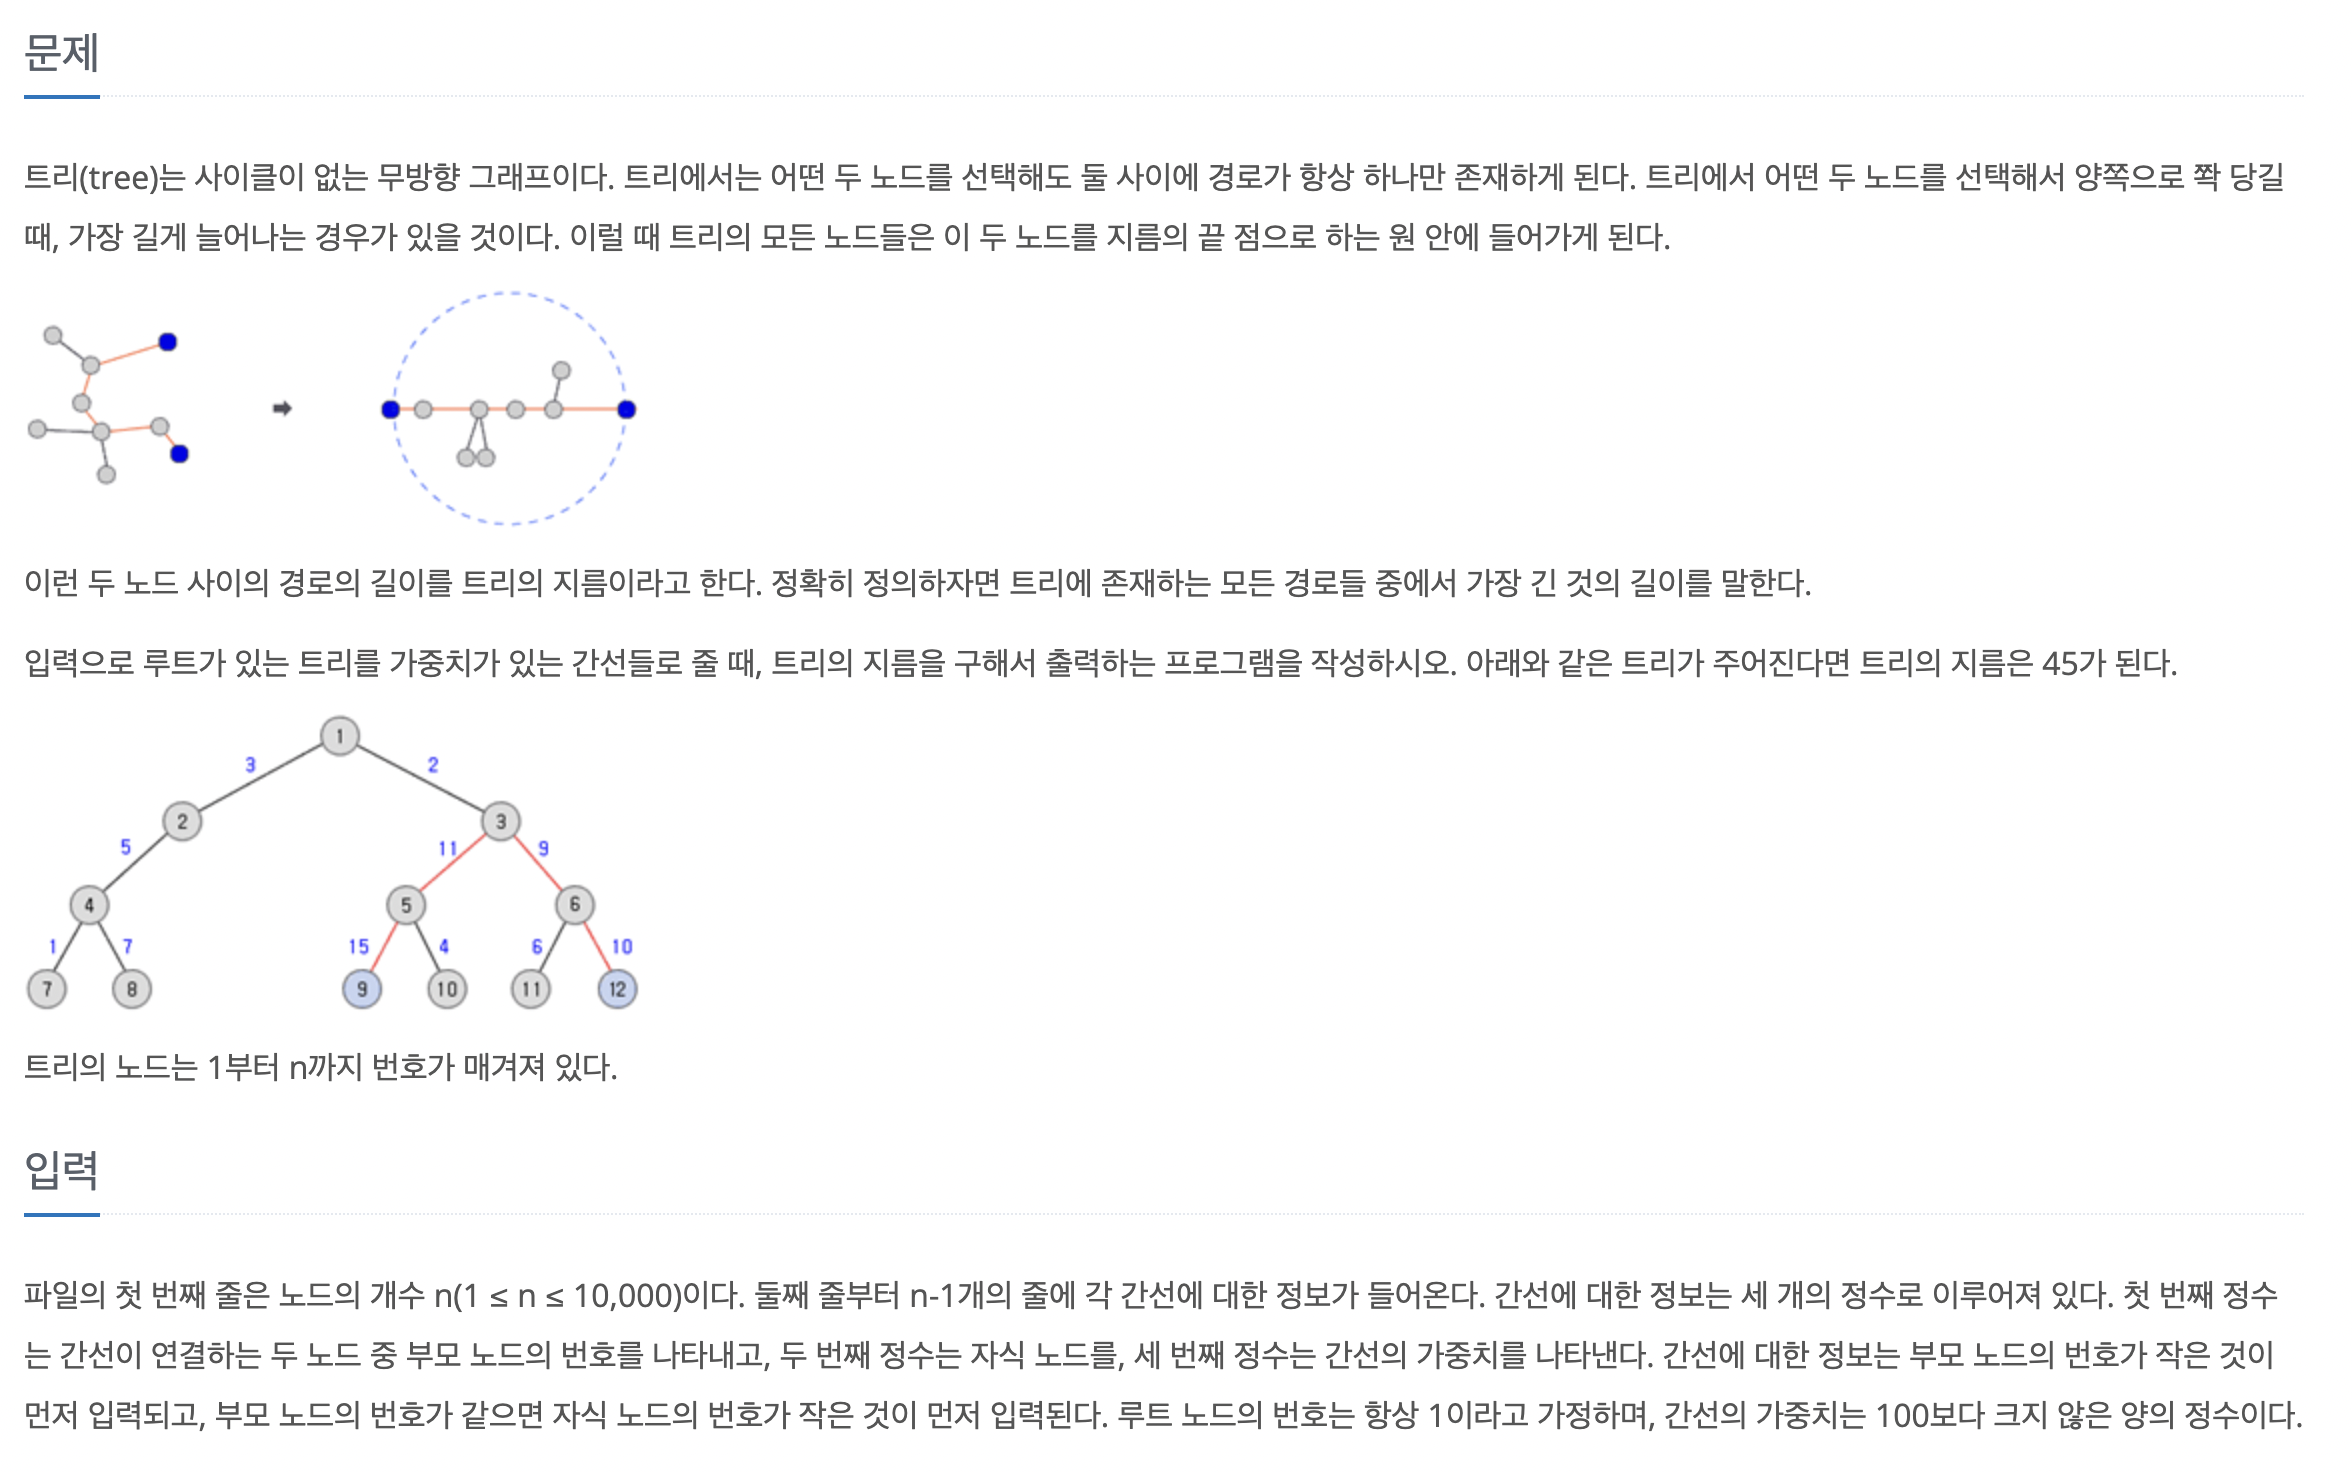
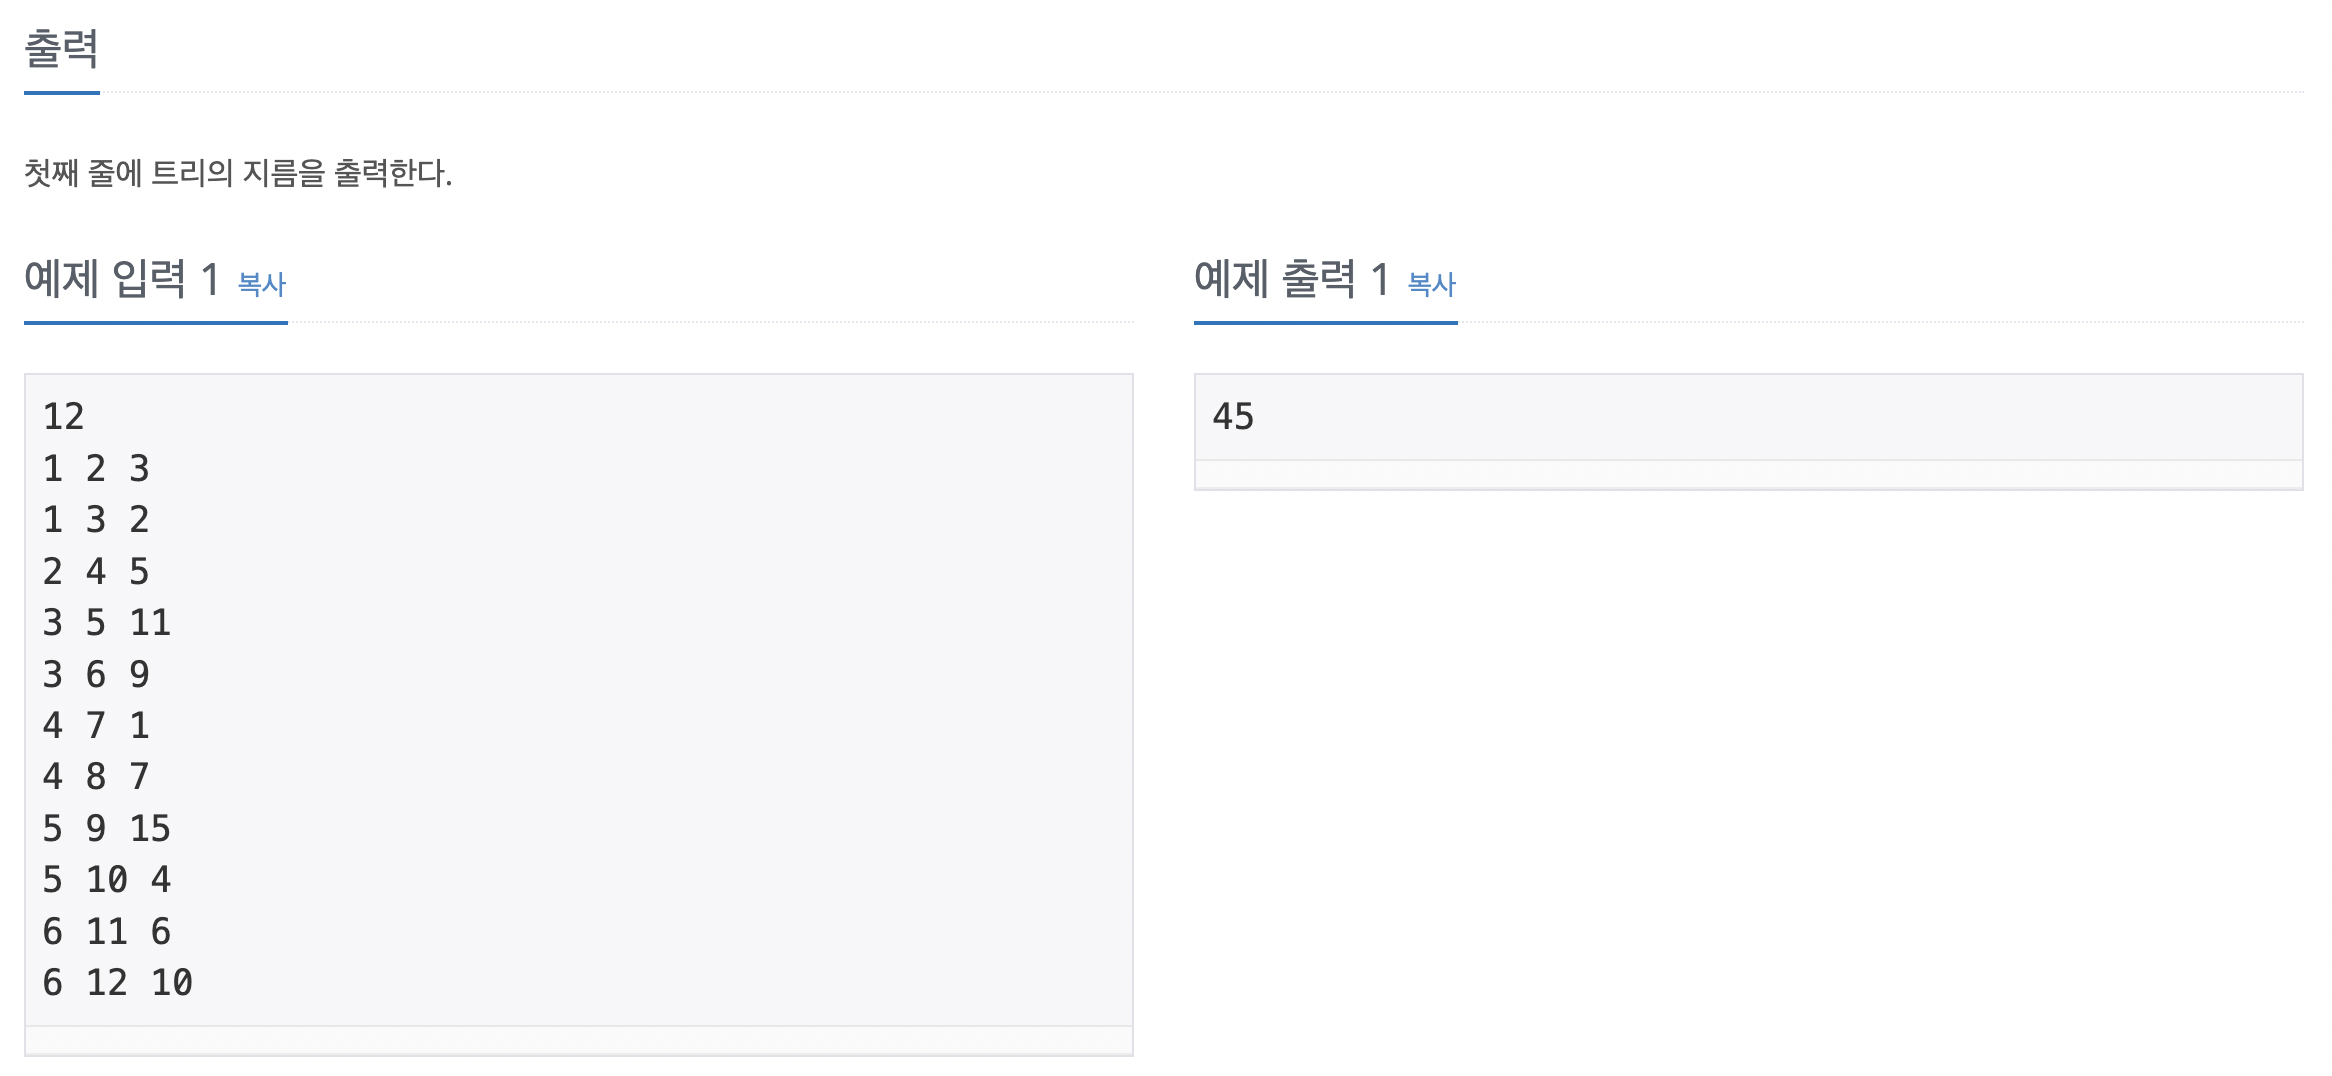

## 시간초과 코드
- 단순하게 각 노드에서 부터 가장 먼 곳을 찾는 방식을 선택하다보니, 시간초과 발생

In [39]:
import sys

def dfs(s):
    visit[s] = True
    
    for nx, w in graph[s]:
        if visit[nx] == False:
            dist[nx] = dist[s] + w
            dfs(nx)

# input = sys.stdin.readline
n = int(input())
graph = [[] for _ in range(n+1)]

for _ in range(n-1):
    x,y,w = map(int,input().split())
    graph[x].append([y,w])
    graph[y].append([x,w])
    
res = 0
for i in range(1,n+1):
    dist = [0]*(n+1)    
    visit = [False] * (n+1)
    dfs(i)
    
    res = max(res, max(dist))

print(res)

12
1 2 3
1 3 2
2 4 5
3 5 11
3 6 9
4 7 1
4 8 7
5 9 15
5 10 4
6 11 6
6 12 10
45


#### 어떻게든 탐색을 최소화 할 방법이 없을까?
- 1번 노드에서 부터 시작한다고 문제에서 가정을 하니, 1번에서 가장 먼 노드를 찾아보자
- ```1번에서 가장 먼 노드 : 가장 깊숙히 박혀있는 노드```
- 1번에서 가장 먼 노드에서부터 가장 먼 노드를 찾고 그 비용을 구하면 되지 않을까?

In [41]:
import sys
sys.setrecursionlimit(10**5)

def dfs(s):
    visit[s] = True
    
    for nx, w in graph[s]:
        if visit[nx] == False:
            dist[nx] = dist[s] + w
            dfs(nx)

# input = sys.stdin.readline
n = int(input())
graph = [[] for _ in range(n+1)]

for _ in range(n-1):
    x,y,w = map(int,input().split())
    graph[x].append([y,w])
    graph[y].append([x,w])
    
dist = [0]*(n+1)    
visit = [False] * (n+1)
dfs(1)

max_far_node = dist.index(max(dist))

dist = [0]*(n+1)    
visit = [False] * (n+1)
dfs(max_far_node)
res = max(dist)

print(res)

12
1 2 3
1 3 2
2 4 5
3 5 11
3 6 9
4 7 1
4 8 7
5 9 15
5 10 4
6 11 6
6 12 10
45


# 문제 3
- 로봇
- https://www.acmicpc.net/problem/1726

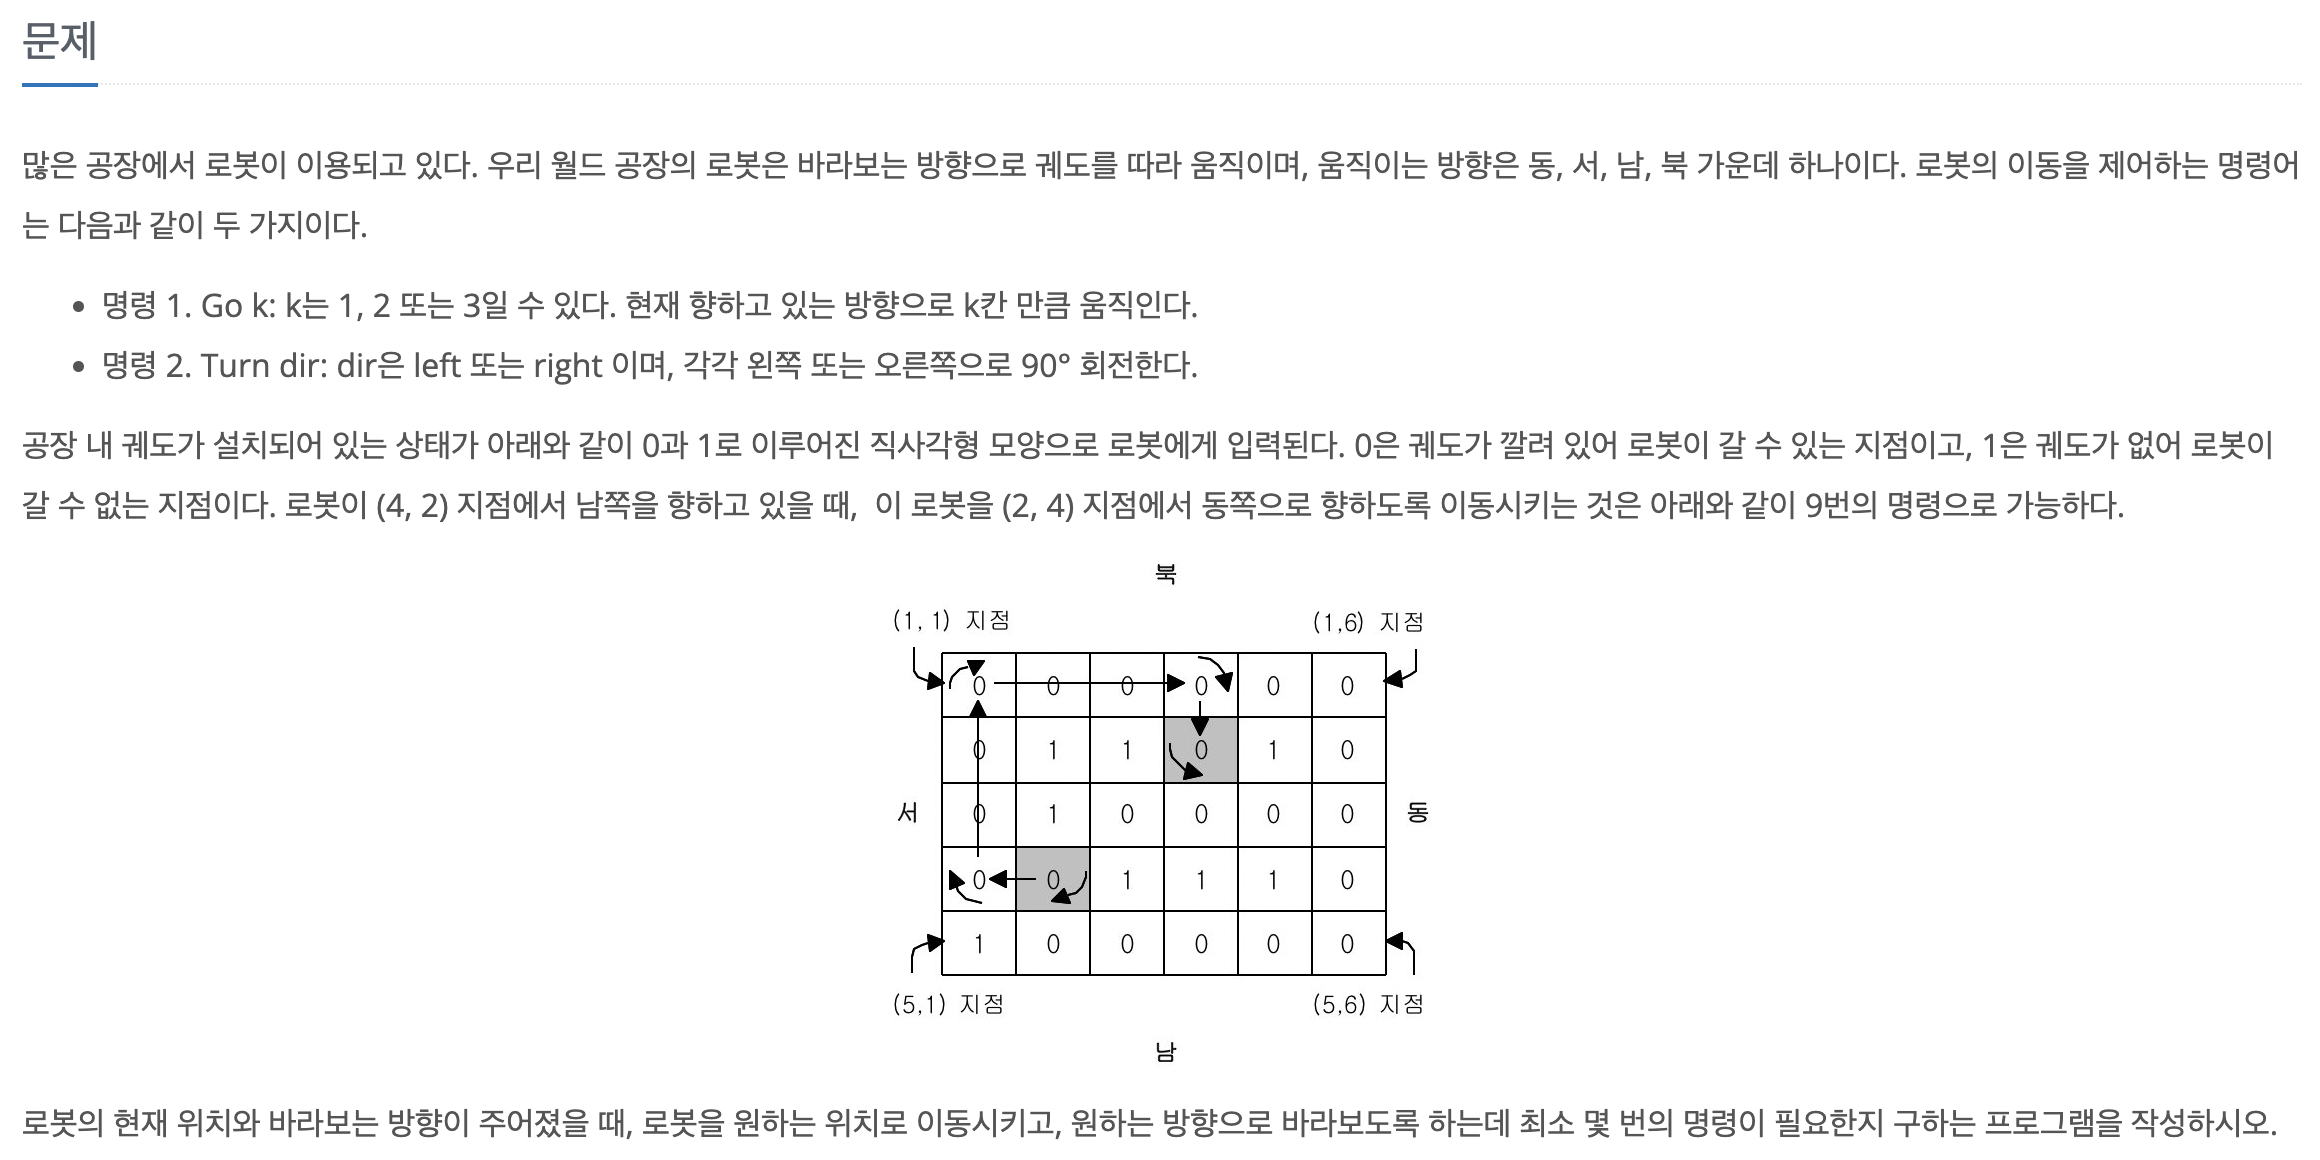
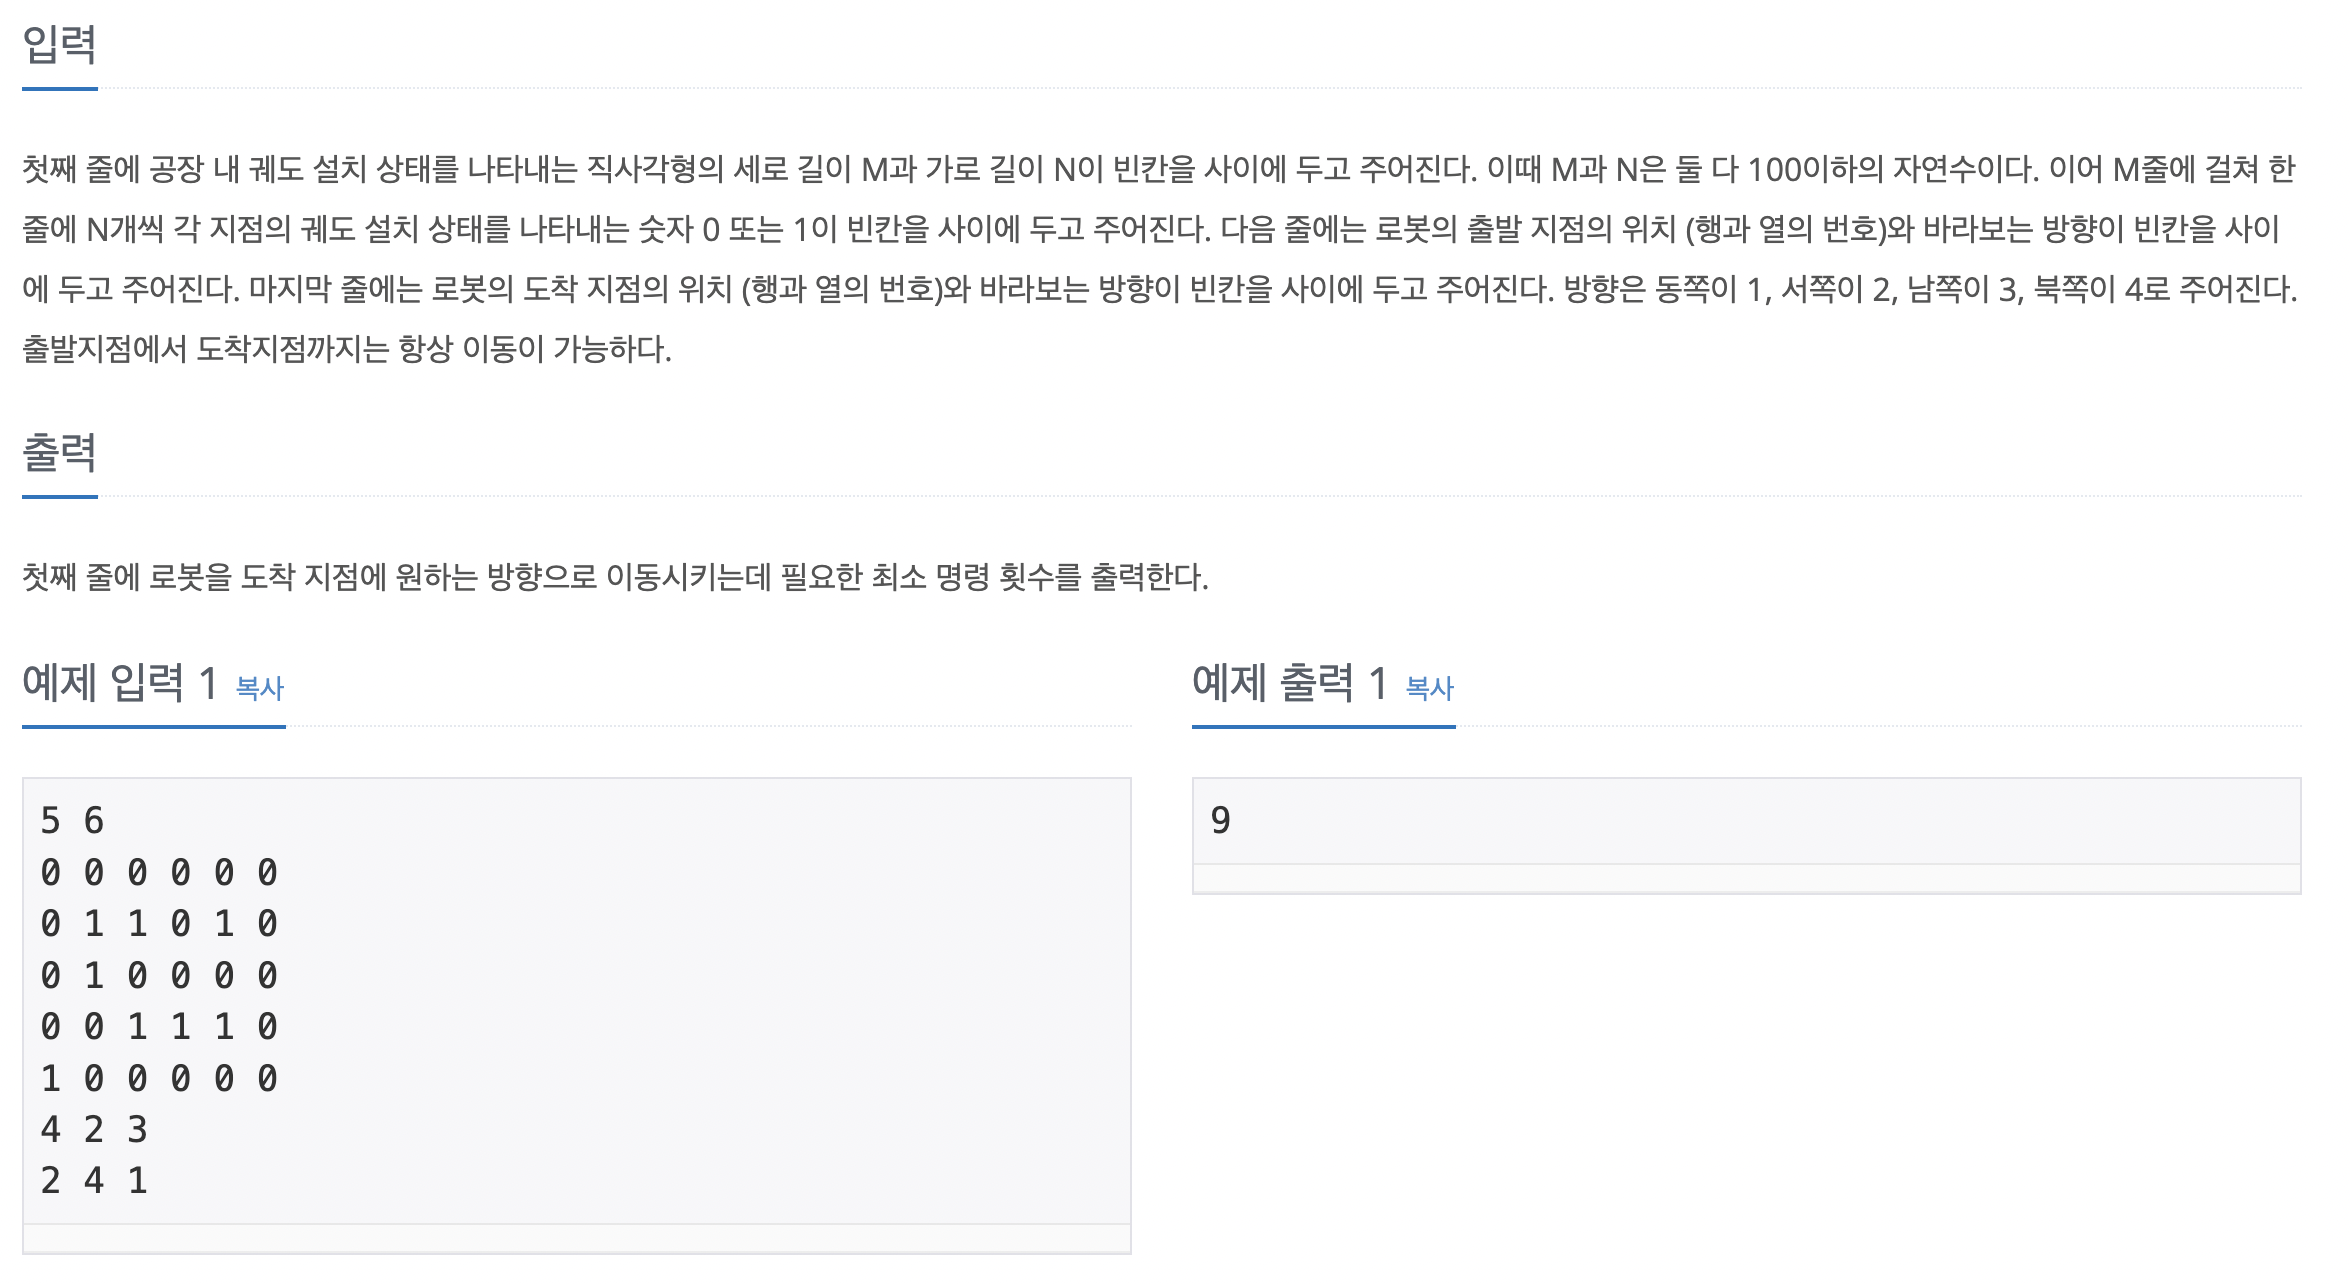

## Step
- bfs를 이용하여 시작점으로부터 도착지점까지 가는데에 몇 번의 명령으로 도달할 수 있는지 기록하자
- 180도 방향을 꺾어서 가는 경우, 방향을 두 번 꺾어야하므로 2번의 명령 소요

## 참고 코드
- https://pacific-ocean.tistory.com/399
- 방향조차도 방문여부에 포함 할 수 있도록 함
- bfs를 이용하여 풀이를 진행

In [80]:
import sys
from collections import deque

# input = sys.stdin.readline

m,n = map(int,input().split())
board = []
for _ in range(m):
    board.append(list(map(int, input().split())))
    
dx = [0,0,0,1,-1]
dy = [0,1,-1,0,0]

start_x, start_y, start_d = map(int,input().split())
end_x, end_y, end_d = map(int,input().split())


def bfs():
    q = deque()
    q.append([start_x-1,start_y-1,start_d,0])
    visit = [[[0 for _ in range(5)] for _ in range(n)] for _ in range(m)]
    visit[start_x-1][start_y-1][start_d] = 1
    
    while q:
        x,y,d,cnt = q.popleft()
        if x == end_x-1 and y == end_y-1 and d == end_d:
            return cnt
#         print(x,y,d,cnt)
        nx,ny = x,y
        for i in range(3):  # 직진 가능한 경우 탐색 (앞으로 3칸 까지만)
            nx += dx[d]
            ny += dy[d]
            if 0<=nx<m and 0<=ny<n and visit[nx][ny][d] == 0:
                if board[nx][ny] != 1:
                    visit[nx][ny][d] = 1
                    q.append([nx,ny,d,cnt+1])
                else:
                    break
        
        for i in range(1,5):  # 회전해야 하는 경우 탐색
            if d != i and visit[x][y][i] == 0:
                visit[x][y][i] = 1
                if (d == 1 and i == 2) or (d == 2 and i == 1) or (d == 3 and i == 4) or (d == 4 and i == 3):
                    q.append([x,y,i,cnt+2])
                else:
                    q.append([x,y,i,cnt+1])
                    
print(bfs())

5 6
0 0 0 0 0 0
0 1 1 0 1 0
0 1 0 0 0 0
0 0 1 1 1 0
1 0 0 0 0 0
4 2 3
2 4 1
9
